In [1]:
from utils import *
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
G, H, iw_pos = get_hamming_7_4()
snrs = np.arange(-5,4,0.25)
max_iter_num = int(5e5)

In [3]:
lp_metrics = np.asarray(ProgressParallel(n_jobs=-1, total=len(snrs), desc=f'SNR')([
    delayed(sim_lp_dec_step)(G,H,iw_pos,snr,max_iter_num) for snr in snrs]))

In [4]:
ml_metrics = np.asarray(ProgressParallel(n_jobs=-1, total=len(snrs), desc=f'SNR')([
    delayed(sim_ml_dec_step)(G,snr,max_iter_num) for snr in snrs]))

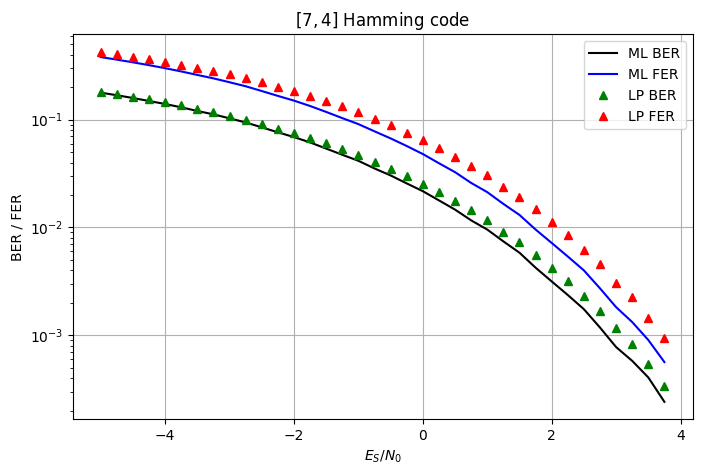

In [5]:
plt.figure(figsize=(8,5))
plt.semilogy(snrs,ml_metrics[:,0],'-k',label='ML BER')
plt.semilogy(snrs,ml_metrics[:,1],'-b',label='ML FER')
plt.semilogy(snrs,lp_metrics[:,0],'g^',label='LP BER')
plt.semilogy(snrs,lp_metrics[:,1],'r^',label='LP FER')
plt.title('$[7,4]$ Hamming code')
plt.xlabel('$E_S/N_0$')
plt.ylabel('BER / FER')
plt.legend()
plt.grid('both')

np.savetxt('lp_metrics.txt',np.vstack((snrs,lp_metrics[:,0],lp_metrics[:,1])).T)
np.savetxt('ml_metrics.txt',np.vstack((snrs,ml_metrics[:,0],ml_metrics[:,1])).T)